In [1]:
# Imprt packages
import pandas as pd

# Load data
# We'll look at the data from the La Liga match between FC Barcelona and Real Madrid on 26 October 2024

df = pd.read_html(
    'https://fbref.com/en/matches/e6bc2844/El-Clasico-Real-Madrid-Barcelona-October-26-2024-La-Liga', 
    attrs={'id': 'shots_all'}
)[0]

In [2]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Minute             Player              Squad                 xG   
0               13.0       Lamine Yamal          Barcelona               0.22   
1               21.0           Raphinha          Barcelona               0.06   
2               22.0    Vinicius Júnior        Real Madrid               0.29   
3               28.0              Pedri          Barcelona               0.02   
4               29.0     Iñigo Martínez          Barcelona               0.03   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
                PSxG            Outcome           Distance          Body Part   
0               0.59              Saved               18.0          Left Foot   
1               0.00         Off Target               22.0          Left Foot   
2               0.00         Off Target               11.0         Right Foot   
3               0.06              Saved               28.0         Right Foot   
4               0.00         Off Target                9.0               Head   

  Unnamed: 8_level_0               SCA 1                             SCA 2  \
               Notes              Player        Event               Player   
0                NaN  Robert Lewandowski  Pass (Live)          Pau Cubarsí   
1                NaN        Lamine Yamal  Pass (Live)          Pau Cubarsí   
2                NaN     Vinicius Júnior      Take-On  Aurélien Tchouaméni   
3                NaN     Alejandro Balde  Pass (Live)                Pedri   
4                NaN            Raphinha  Pass (Live)                Pedri   

                
         Event  
0  Pass (Live)  
1  Pass (Live)  
2  Pass (Live)  
3  Pass (Live)  
4  Pass (Live)

In [3]:
# Clean columns up
# Drop the SCA columns because they will mess up our column names
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

df.columns = df.columns.droplevel(0)
df.columns

Index(['Minute', 'Player', 'Squad', 'xG', 'PSxG', 'Outcome', 'Distance',
       'Body Part', 'Notes'],
      dtype='object')

In [4]:
# Filter the columns we need
df = df[['Squad', 'Player', 'Minute', 'xG', 'Outcome']]
df.head()

,Squad,Player,Minute,xG,Outcome
0,Barcelona,Lamine Yamal,13.0,0.22,Saved
1,Barcelona,Raphinha,21.0,0.06,Off Target
2,Real Madrid,Vinicius Júnior,22.0,0.29,Off Target
3,Barcelona,Pedri,28.0,0.02,Saved
4,Barcelona,Iñigo Martínez,29.0,0.03,Off Target


In [5]:
# Create a column for the cumulative xG for each team
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()
#Add last name column
df['last_name'] = df['Player'].str.split().str[-1]
df

,Squad,Player,Minute,xG,Outcome,cumulative_xG,last_name
0,Barcelona,Lamine Yamal,13.0,0.22,Saved,0.22,Yamal
1,Barcelona,Raphinha,21.0,0.06,Off Target,0.28,Raphinha
2,Real Madrid,Vinicius Júnior,22.0,0.29,Off Target,0.29,Júnior
3,Barcelona,Pedri,28.0,0.02,Saved,0.30,Pedri
4,Barcelona,Iñigo Martínez,29.0,0.03,Off Target,0.33,Martínez
5,Barcelona,Lamine Yamal,37.0,0.02,Off Target,0.35,Yamal
6,Barcelona,Fermin López,43.0,0.02,Blocked,0.37,López
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Barcelona,Lamine Yamal,51.0,0.01,Saved,0.38,Yamal
9,Real Madrid,Vinicius Júnior,52.0,0.03,Blocked,0.32,Júnior


In [6]:
# Need to get the minute in a format that can be used to plot the flow chart
# First drop the nan values that FBREF uses as a divider
# Then cast to an int
df = df.dropna(subset=['Minute'])
df['Minute'] = df['Minute'].astype(int)
df['Minute']

/var/folders/6b/pnk56jw91v53sy1918fd0s0c0000gn/T/ipykernel_85132/2885106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Minute'].astype(int)


0     13
1     21
2     22
3     28
4     29
5     37
6     43
8     51
9     52
10    54
11    55
12    56
13    61
14    64
15    64
16    66
17    69
18    70
19    71
20    77
21    77
22    84
23    84
24    89
Name: Minute, dtype: int64

In [7]:
#Adding half column
df['Half'] = df['Minute'].apply(lambda x: 1 if x <= 45 else 2).astype(int)
df

/var/folders/6b/pnk56jw91v53sy1918fd0s0c0000gn/T/ipykernel_85132/530558622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Half'] = df['Minute'].apply(lambda x: 1 if x <= 45 else 2).astype(int)


,Squad,Player,Minute,xG,Outcome,cumulative_xG,last_name,Half
0,Barcelona,Lamine Yamal,13,0.22,Saved,0.22,Yamal,1
1,Barcelona,Raphinha,21,0.06,Off Target,0.28,Raphinha,1
2,Real Madrid,Vinicius Júnior,22,0.29,Off Target,0.29,Júnior,1
3,Barcelona,Pedri,28,0.02,Saved,0.30,Pedri,1
4,Barcelona,Iñigo Martínez,29,0.03,Off Target,0.33,Martínez,1
5,Barcelona,Lamine Yamal,37,0.02,Off Target,0.35,Yamal,1
6,Barcelona,Fermin López,43,0.02,Blocked,0.37,López,1
8,Barcelona,Lamine Yamal,51,0.01,Saved,0.38,Yamal,2
9,Real Madrid,Vinicius Júnior,52,0.03,Blocked,0.32,Júnior,2
10,Barcelona,Robert Lewandowski,54,0.25,Goal,0.63,Lewandowski,2


Text(0.1, 0.0, 'data via FBref.com\n@KQAnalytics/twitter')

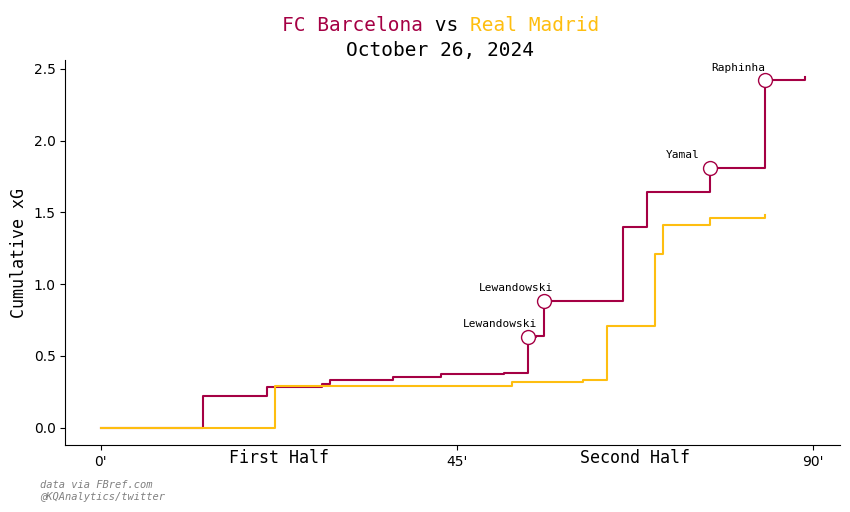

In [17]:
# Create the flow chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the xG for each team by half
# Make it so the lines both start at 0

barca_color = '#a50044'
madrid_color = '#FEBE10'

for team in df['Squad'].unique():
    
    team_df = df[df['Squad'] == team]
  
    # add a 0 xG row at the start of the match
    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': 'Off Target', 'cumulative_xG': 0, 'Half': 1}, index=[0]), team_df])

    # Also add a row at the beginning of the second half to make the lines start where the first half ended
    team_df = pd.concat([team_df[team_df['Half'] == 1], pd.DataFrame({'Squad': team, 'Minute': 45, 'xG': 0, 'Outcome': 'Off Target', 'cumulative_xG': team_df[team_df['Half'] == 1]['cumulative_xG'].iloc[-1], 'Half': 2}, index=[0]), team_df[team_df['Half'] == 2]])

    ax.plot(
        team_df['Minute'], 
        team_df['cumulative_xG'], 
        label=team, 
        drawstyle='steps-post',
        c= barca_color if team == 'Barcelona' else madrid_color
    )   


# Add a scatter plot to show the goals
for team in df['Squad'].unique():
    team_df = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for x in team_df:
        ax.scatter(
            x['Minute'], 
            x['cumulative_xG'], 
            c='white',
            edgecolor=barca_color if team == 'Barcelona' else madrid_color,
            s=100,
            # Want the goals to be on top of the lines
            zorder=5
        )
        
        # add a label to the goals for the player who scored
        ax.text(
            x['Minute'] - 3.5, 
            x['cumulative_xG'] + .09, 
            x['last_name'], 
            ha='center', 
            va='center', 
            fontfamily='monospace', 
            fontsize=8,
            zorder=10
        )
       
# Label the x axis with first and second half
ax.set_xticks([0, 45, 90])
ax.set_xticklabels(['0\'', '45\'', '90\''])

# Add the actual words "First Half" and "Second Half" to the plot under the x axis
ax.text(22.5, -.25, 'First Half', ha='center', fontfamily='monospace', fontsize=12)
ax.text(67.5, -.25, 'Second Half', ha='center', fontfamily='monospace', fontsize=12)

# Label the y axis with the cumulative xG
ax.set_ylabel('Cumulative xG', fontfamily='monospace', fontsize=12)

# Get rid of the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Change the color of the title to show which team is which using the highlight-text package
from highlight_text import fig_text

fig_text(
    0.5,
    0.95,
    '<FC Barcelona> vs <Real Madrid>', 
    fontsize=14, 
    ha='center', 
    va='center', 
    ax=ax, 
    fontfamily='monospace', 
    highlight_textprops=[{'color': barca_color}, {'color': madrid_color}]
)

fig_text(
    0.5,
    0.9,
    'October 26, 2024', 
    fontsize=14, 
    ha='center', 
    va='center', 
    ax=ax, 
    fontfamily='monospace'
)


# Add a twitter @ to the bottom left of the plot
fig.text(
    0.1, 
    0.00, 
    'data via FBref.com\n@KQAnalytics/twitter', 
    fontsize=7.5, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='gray'
)

In [18]:
# save the figure
fig.savefig('/Users/kevingquinn/Desktop/barca_madrid_xG_flowchart_26_Oct_2024.png', dpi=300, bbox_inches='tight')